In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
from sklearn import linear_model

%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action="ignore")

In [2]:
house=pd.read_csv('./trainn.csv')
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
housee=house[['MSSubClass','Neighborhood','Condition2','Exterior1st','OverallCond','ExterCond','Heating','SaleType','SalePrice']]

In [4]:
housee.MSSubClass = housee.MSSubClass.astype('category')

In [5]:
tablo=pd.concat([housee,pd.get_dummies(housee[['Neighborhood','Condition2',
                                        'Exterior1st','ExterCond','Heating','SaleType','MSSubClass']])],axis=1).drop(columns=['Neighborhood','Condition2',
                                        'Exterior1st','ExterCond','Heating','SaleType','MSSubClass'],axis=1)
y=tablo['SalePrice']
x=tablo.drop('SalePrice', axis = 1)


In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=465)
print("Eğitim kümesindeki gözlem sayısı : {}".format(x_train.shape[0]))
print("Test kümesindeki gözlem sayısı   : {}".format(x_test.shape[0]))

Eğitim kümesindeki gözlem sayısı : 1168
Test kümesindeki gözlem sayısı   : 292


In [7]:
x_train = sm.add_constant(x_train)
model1 = sm.OLS(y_train, x_train).fit()

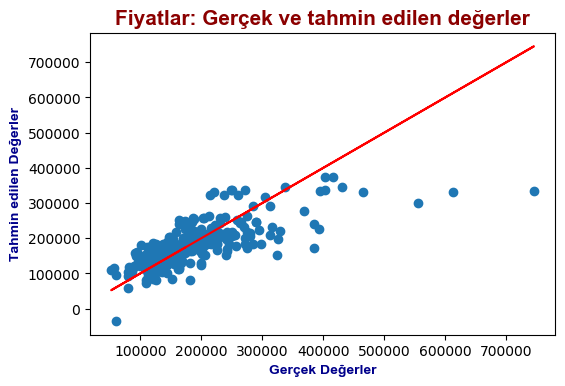

In [8]:
x_test = sm.add_constant(x_test)
y_preds = model1.predict(x_test)
baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }
plt.figure(dpi = 100)
plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Gerçek Değerler", fontdict=eksen_font)
plt.ylabel("Tahmin edilen Değerler", fontdict=eksen_font)
plt.title("Fiyatlar: Gerçek ve tahmin edilen değerler", fontdict=baslik_font)
plt.show()

In [9]:
print("Tüm Değişkenler ({} değişken)".format(x.shape[1]-1))
print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test, y_preds)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test, y_preds)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test, y_preds)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100)) 

Tüm Değişkenler (83 değişken)
Ortalama Mutlak Hata (MAE)        : 37103.778487912685
Ortalama Kare Hata (MSE)          : 3237252865.3291736
Kök Ortalama Kare Hata (RMSE)     : 56896.86164745094
Ortalama Mutlak Yüzde Hata (MAPE) : 20.36452396111507


Modelimize OverallQual değişkenini ekleyelim.

In [10]:
housee1=house[['MSSubClass','Neighborhood','Condition2','Exterior1st','OverallCond','OverallQual','ExterCond','Heating','SaleType','SalePrice']]

In [11]:
housee1.MSSubClass = housee.MSSubClass.astype('category')

In [12]:
tablo2=pd.concat([housee1,pd.get_dummies(housee1[['Neighborhood','Condition2',
                                        'Exterior1st','ExterCond','Heating','SaleType','MSSubClass']])],axis=1).drop(columns=['Neighborhood','Condition2',
                                        'Exterior1st','ExterCond','Heating','SaleType','MSSubClass'],axis=1)
Y=tablo2['SalePrice']
X=tablo2.drop('SalePrice', axis = 1)

In [13]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2, random_state=465)
print('Eğitim kümesindeki gözlem sayısı : {}'.format(X_train.shape[0]))
print("Test kümesindeki gözlem sayısı   : {}".format(X_test.shape[0]))

Eğitim kümesindeki gözlem sayısı : 1168
Test kümesindeki gözlem sayısı   : 292


In [14]:
X_train=sm.add_constant(X_train)
model2=sm.OLS(Y_train,X_train).fit()

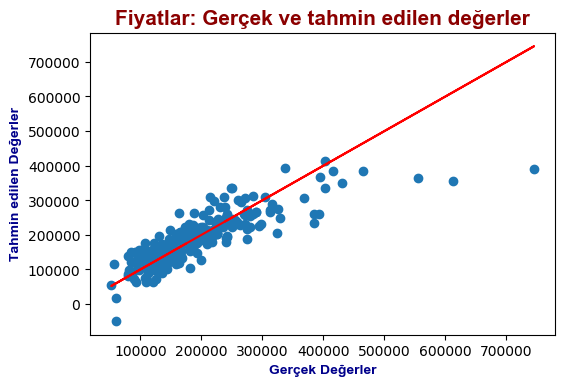

In [15]:
X_test=sm.add_constant(X_test)
Y_preds=model2.predict(X_test)
plt.figure(dpi = 100)
plt.scatter(Y_test, Y_preds)
plt.plot(Y_test, Y_test, color="red")
plt.xlabel("Gerçek Değerler", fontdict=eksen_font)
plt.ylabel("Tahmin edilen Değerler", fontdict=eksen_font)
plt.title("Fiyatlar: Gerçek ve tahmin edilen değerler", fontdict=baslik_font)
plt.show()

In [16]:
print("Tüm Değişkenler ({} değişken)".format(X.shape[1]-1))
print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(Y_test, Y_preds)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(Y_test, Y_preds)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(Y_test, Y_preds)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((Y_test - Y_preds) / Y_test)) * 100)) 

Tüm Değişkenler (84 değişken)
Ortalama Mutlak Hata (MAE)        : 30300.503406200973
Ortalama Kare Hata (MSE)          : 2130995939.0773892
Kök Ortalama Kare Hata (RMSE)     : 46162.711565476624
Ortalama Mutlak Yüzde Hata (MAPE) : 17.383312839810767


In [17]:
print(model2.rsquared)
print(model1.rsquared)

0.7797420156907622
0.6846274962136625


In [18]:
print("İlk model AIC puanı           : ", model1.aic)
print("İlk model BIC puanı           : ", model1.bic)
print("İkinci model AIC puanı        : ", model2.aic)
print("İkinci model BIC puanı        : ", model2.bic)

İlk model AIC puanı           :  28429.736740467044
İlk model BIC puanı           :  28814.528400884545
İkinci model AIC puanı        :  28012.477327815435
İkinci model BIC puanı        :  28402.332036396325


Hata değerlerim azaldı. model2 modelinin tahmin performansı daha iyidir.

In [19]:
#Bir fonksiyon yardımı ile işlemlerimizi hızlıca yapabiliriz.

In [20]:
p_degerleri = model2.pvalues
anlamlı_degiskenler = list(p_degerleri[p_degerleri<0.05].index)

In [21]:
X=tablo2[anlamlı_degiskenler]
Y=tablo2["SalePrice"]

In [22]:
def metrik_ols(X,Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,random_state = 465)
    X_train = sm.add_constant(X_train)
    model = sm.OLS(Y_train, X_train).fit()
    X_test = sm.add_constant(X_test)
    Y_preds = model.predict(X_test)
    mae_ = mean_absolute_error(Y_test, Y_preds)
    mse_ = mse(Y_test, Y_preds)
    rmse_ = rmse(Y_test, Y_preds)
    mape_ = np.mean(np.abs((Y_test - Y_preds) / Y_test)) * 100
    return mae_, mse_, rmse_, mape_,model.rsquared

In [23]:
metrik_ols(X,Y)

(30003.352541245207,
 2079055494.6027615,
 45596.66100278354,
 17.204054590821833,
 0.768680545100613)